In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [31]:
from custom_etkdg.utils import *
from custom_etkdg.mol_ops import *
from custom_etkdg.noe import NOE
from rdkit import Chem
import logging
import pandas as pd
#can visualise the conformers
import nglview as nv


pd.set_option('display.max_rows', None)

logging.getLogger().setLevel(logging.INFO)
# logging.basicConfig(format=' %(asctime)s - %(levelname)s - %(message)s')
logging.basicConfig(format='%(levelname)s - %(message)s')


INFO - OpenFF not avaialble, trying OpenForceField


# 1.Parsing
1. creates RDKit molecule by matching SMILES string to PDB record
1. assign names to hydrogens 
1. parse NOE restraints file, creates a `NOE` object
1. checking correspondance between the molecule and the NOE records

## Parsing in the molecule

In [3]:
#load example molecule residing in the corresponding directory
name = "6HVC"
name = "{}/{}".format(name.upper(), name.lower())
smiles = open(get_data_file_path("{}.smi".format(name)), "r").readlines()[0].strip()

In [4]:
# `infer_names` allows naming hydrogens based on the name of their attached heavy atom
# often the hydrogen names in the NOE is not those in the pdb
# more matches tend to occur with infer_names = True

#INFO shows the registered name of each hydrogen atom 
mol = mol_from_smiles_pdb(smiles, pdb_filename = get_data_file_path("{}.pdb".format(name)), 
                          infer_names = False,
                         stereo_from_smiles = False)

RDKit ERROR: [22:43:08] Explicit valence for atom # 0 N, 6, is greater than permitted
[22:43:08] Explicit valence for atom # 0 N, 6, is greater than permitted
WARNING - SMILES matching to pdb with hydrogen records failed. Matching to pdb without hydrogens...
INFO - Residue number 4, hydrogen attached to atom  N   is assigned name H1
INFO - Residue number 4, hydrogen attached to atom  N   is assigned name H2
INFO - Residue number 4, hydrogen attached to atom  N   is assigned name H3
INFO - Residue number 4, hydrogen attached to atom  CA  is assigned name HA
INFO - Residue number 4, hydrogen attached to atom  CB  is assigned name HB2
INFO - Residue number 4, hydrogen attached to atom  CB  is assigned name HB3
INFO - Residue number 5, hydrogen attached to atom  N   is assigned name H
INFO - Residue number 5, hydrogen attached to atom  CA  is assigned name HA
INFO - Residue number 5, hydrogen attached to atom  CB  is assigned name HB2
INFO - Residue number 5, hydrogen attached to atom  CB 

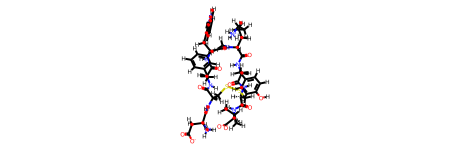

In [5]:
mol

### 3D depiction
Session does not persist, run code to interact with the molecule.

In [6]:
view = nv.show_rdkit(mol) 
view.clear_representations()
view.add_licorice()
view

NGLWidget()

## Parse the NOE records

In [7]:
# parse NOE file into an object
noe = NOE()
noe.from_explor(get_data_file_path("{}.mr".format(name)))

WARNING - Could not recognize XPLOR or BIOSYM formats in file. Attempting to parse "blank".
INFO - Parser: Read data as "blank" format.


In [8]:
noe.show_records()

,Residue_index_1,Residue_name_1,Residue_index_2,Residue_name_2,Upper_bound_[A]
0,4,HA,5,HN,2.71
1,5,HN,5,HB2,2.83
2,5,HN,5,HB3,2.83
3,5,HA,5,HB2,2.83
4,5,HA,5,HB3,2.83
5,5,HA,6,HN,2.68
6,5,HA,6,HD@,7.62
7,5,HA,10,HA,2.59
8,5,HA,11,HN,3.73
9,5,HB@,10,HA,5.39


## Checking mapping between NOE records and the Mol object

INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO - NumExpr defaulting to 8 threads.
INFO - 
        35 records assigned to molecule (records for chemically equivalent atoms count as one), including:
               -17 records for atoms separated by 0 residues.
               -13 records for atoms separated by 1 residues.
               -3 records for atoms separated by 2 residues.
               -2 records for atoms separated by 3 residues.
        Largest separation has atoms separated by 19 bonds, where the largest ring in molecule is of size 20.         
        32 records cannot be assigned to molecule due to mismatch.
        
WARNING - Residue 7 atom HN in NOE table is not found in the corresponding residue in molecule containing: ['H', 'HA', 'HB2', 'HB3', 'HD1', 'HE1', 'HE3', 'HZ2', 'HZ3', 'HH2']
Residue 6 atom HN in NOE table is not found in the corresponding residue in molecule containing: ['H', 'HA', 'HB2', 'HB3', 'H

,Atom Index,Atom Name,Residue Number,Residue Name,Depiction
0,21,HA,5,CYS,
1,22,HB2,5,CYS,
2,23,HB3,5,CYS,
3,"22,23",HB@,5,CYS,
4,36,HA,6,PHE,
5,37,HB2,6,PHE,
6,38,HB3,6,PHE,
7,"37,38",HB@,6,PHE,
8,"39,40",HD@,6,PHE,
9,"41,42",HE@,6,PHE,

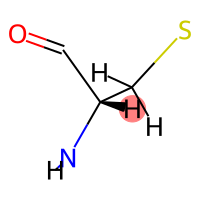
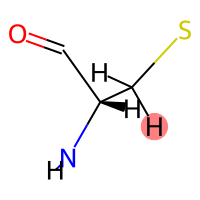
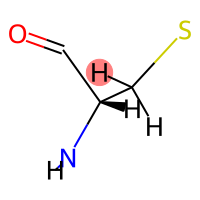
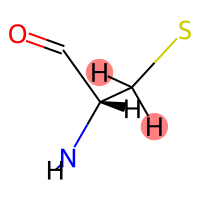
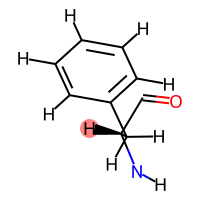
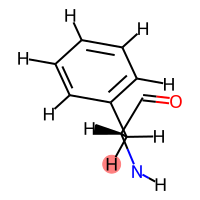
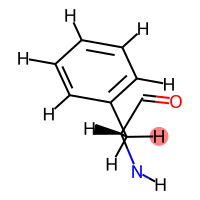
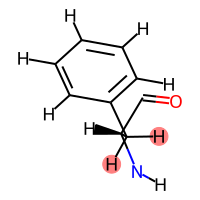
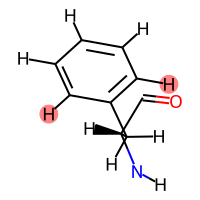
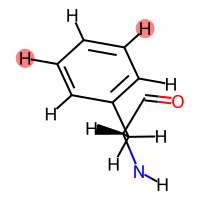
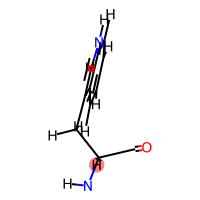
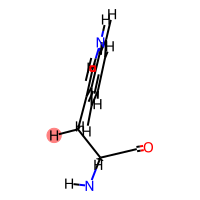
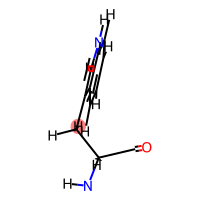
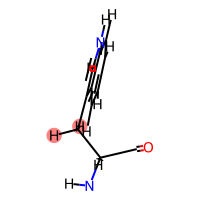
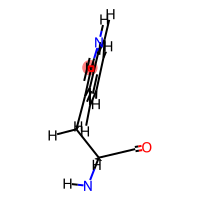
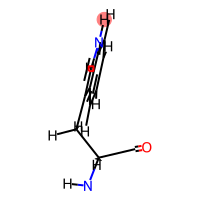
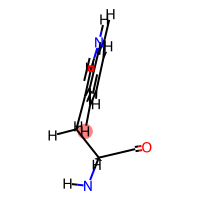
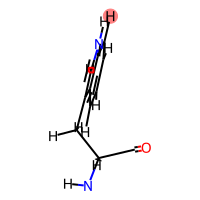
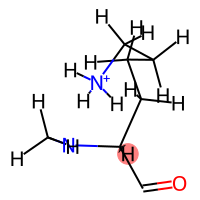
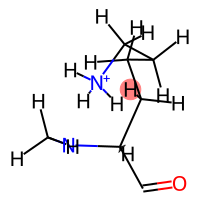
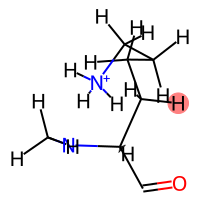
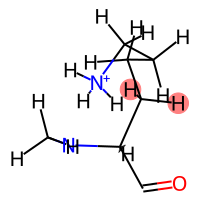
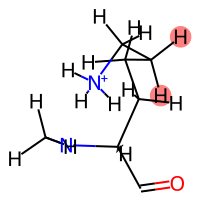
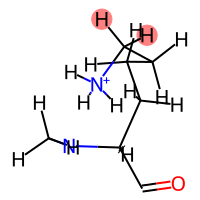
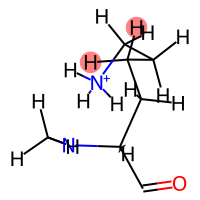
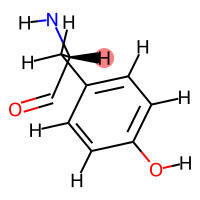
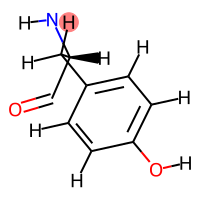
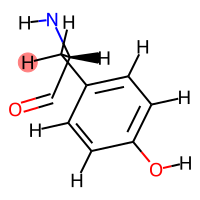
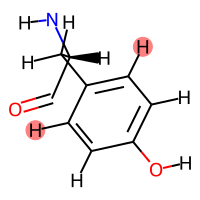
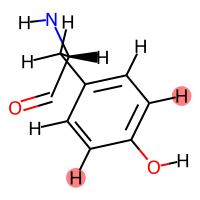
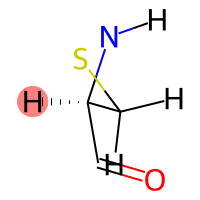
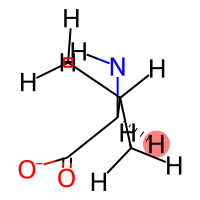
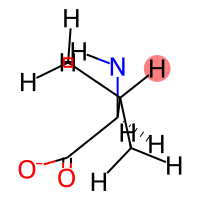
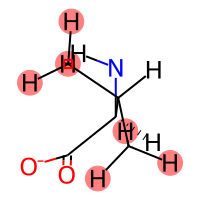

In [9]:
# give the NOE record the molecule to check for matches between the two
# First, any mismatches will show up as a warning (None in this molecule)
# then some basic information on the matches are shown

# the ensuing pandas table shows basic information on each matched hydrogen atom, 
# and an pictorial illustration on a residue level
noe.check_match_to_mol(mol)

INFO - 
        63 records assigned to molecule (records for chemically equivalent atoms count as one), including:
               -31 records for atoms separated by 0 residues.
               -22 records for atoms separated by 1 residues.
               -7 records for atoms separated by 2 residues.
               -3 records for atoms separated by 3 residues.
        Largest separation has atoms separated by 19 bonds, where the largest ring in molecule is of size 20.         
        4 records cannot be assigned to molecule due to mismatch.
        
WARNING - Residue 8 atom HH@ in NOE table is not found in the corresponding residue in molecule containing: ['HA', 'HB2', 'HB3', 'HG2', 'HG3', 'HD2', 'HD3', 'HE2', 'HE3', 'HZ1', 'HZ3', 'HM1', 'HM2', 'HM3', 'HZ2']


,Atom Index,Atom Name,Residue Number,Residue Name,Depiction
0,11,HA,4,ASP,
1,21,HA,5,CYS,
2,22,HB2,5,CYS,
3,23,HB3,5,CYS,
4,"22,23",HB@,5,CYS,
5,20,HN,5,CYS,
6,36,HA,6,PHE,
7,37,HB2,6,PHE,
8,38,HB3,6,PHE,
9,"37,38",HB@,6,PHE,

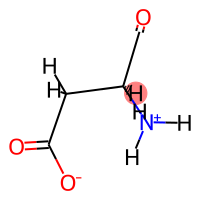
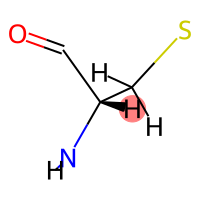
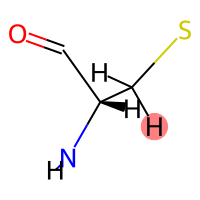
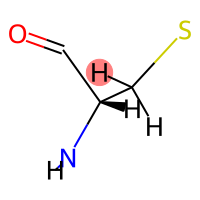
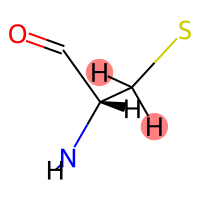
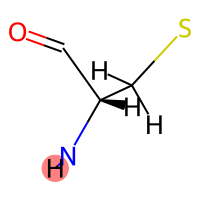
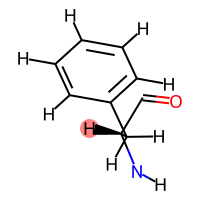
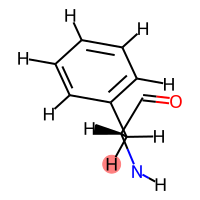
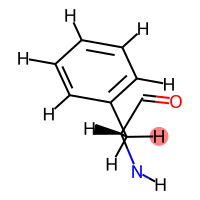
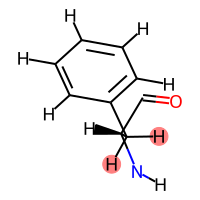
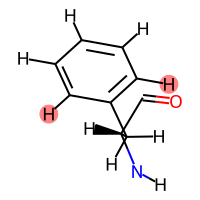
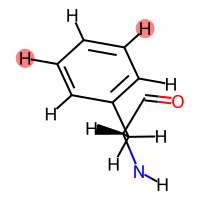
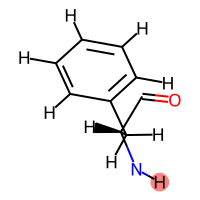
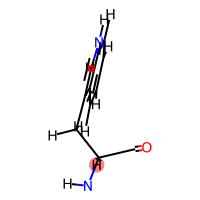
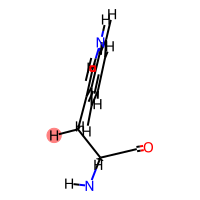
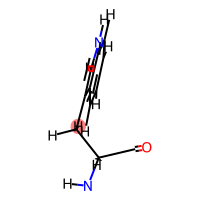
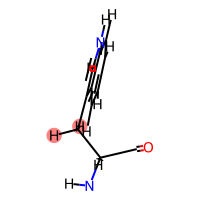
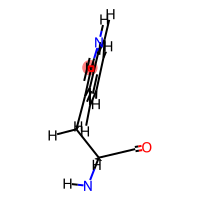
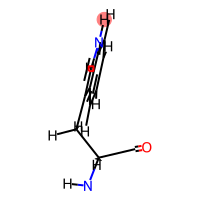
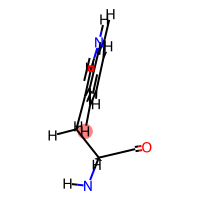
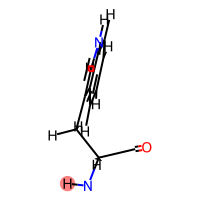
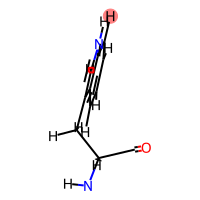
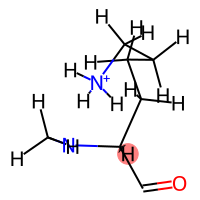
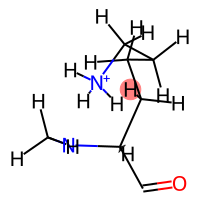
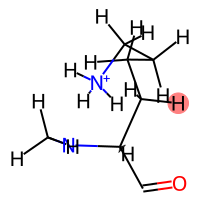
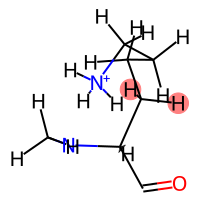
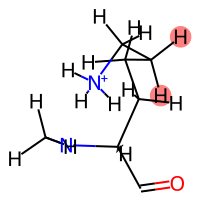
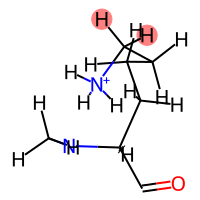
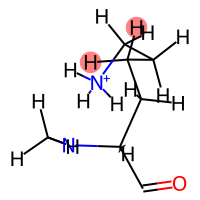
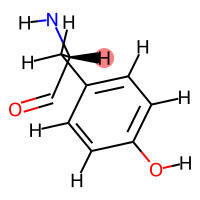
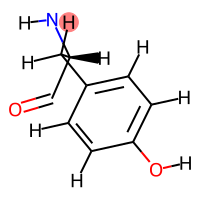
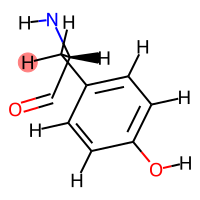
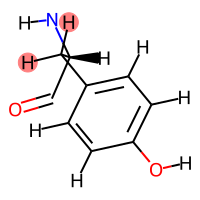
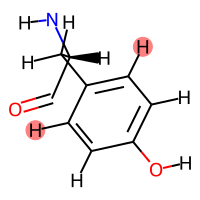
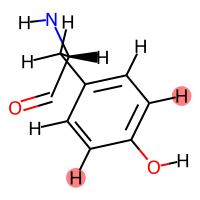
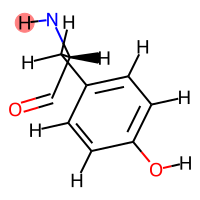
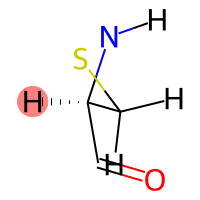
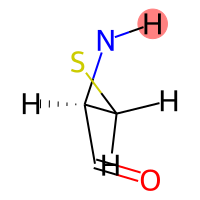
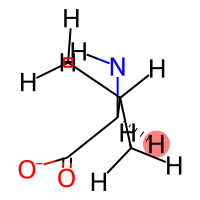
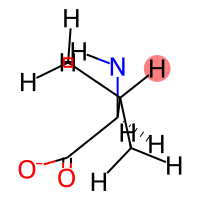
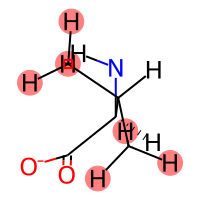
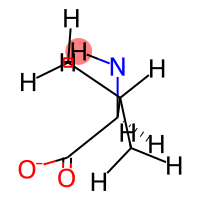

In [10]:
#it is quite easy to figure out from above that most mismatches are due to H <-> HN naming:
mol = rename(mol, old_name = "H", new_name = "HN", resid = "all")
noe.check_match_to_mol(mol)

In [11]:
noe.show_records()

,Residue_index_1,Residue_name_1,Residue_index_2,Residue_name_2,Upper_bound_[A],Bonds Separation,Residues Separation,Has Match in Molecule
0,7,HE3,8,HH@,5.32,<NA>,<NA>,False
1,8,HH@,8,HG2,4.45,<NA>,<NA>,False
2,8,HH@,8,HG3,4.45,<NA>,<NA>,False
3,8,HH@,8,HG@,4.15,<NA>,<NA>,False
4,4,HA,5,HN,2.71,4,1,True
5,5,HN,5,HB2,2.83,4,0,True
6,5,HN,5,HB3,2.83,4,0,True
7,5,HA,5,HB2,2.83,3,0,True
8,5,HA,5,HB3,2.83,3,0,True
9,5,HA,6,HN,2.68,4,1,True


# 2.Confgen
1. combine NOE and molecule into `RestrainedMolecule`
    - `RestrainedMolecule` is inherited from RDKit molecule, any operation on RDKit molecule would work on it too
    - it is a generic object for generating conformers with additional distance (and in the future maybe other types of) restraints, agnostic of them being from NOE or other origins


In [12]:
resmol = noe.add_noe_to_mol(mol)

WARNING - Residue 8 atom HH@ in NOE table is not found in the corresponding residue in molecule containing: ['HA', 'HB2', 'HB3', 'HG2', 'HG3', 'HD2', 'HD3', 'HE2', 'HE3', 'HZ1', 'HZ3', 'HM1', 'HM2', 'HM3', 'HZ2']


In [13]:
type(resmol)

custom_etkdg.molecule.RestrainedMolecule

In [14]:
import custom_etkdg
custom_etkdg.molecule.RestrainedMolecule.__bases__ #check inheritance 

(rdkit.Chem.rdchem.Mol,)

In [15]:
resmol.GetNumConformers()

0

In [16]:
# incorporate the restraints into the distance bounds for conformer generation
resmol.update_bmat()

In [17]:
# currently confgen can stall if the bounds are too tight
# so first get a feel of the time needed for generation the required conformer ensemble (default 3 repeats)
resmol.estimate_time(max_time_per_conf = 10) #in seconds

INFO - Molecule is macrocycle (largest ring contain more than 9 atoms), scaling down the bounds matrix force contribution.
INFO - Molecule is macrocycle (largest ring contain more than 9 atoms), scaling down the bounds matrix force contribution.
INFO - Molecule is macrocycle (largest ring contain more than 9 atoms), scaling down the bounds matrix force contribution.
INFO - 1.7 seconds per conformer on average.


1.707964261372884

In [18]:
resmol.generate_conformers(num_conf = 10)

INFO - Molecule is macrocycle (largest ring contain more than 9 atoms), scaling down the bounds matrix force contribution.


### Scaling down the contribution of bounds matrix in macrocycles
- Detail see our PR: https://github.com/rdkit/rdkit/pull/4516
- **Will come out in the 2021.09 release on Oct 18th**

In [19]:
resmol.etkdg_params.boundsMatForceScaling

0.3

In [20]:
resmol.GetNumConformers()

10

# 3.Bundle Selection (and Evaluation)

In [21]:
import glob
resmol.RemoveAllConformers()
resmol = load_coordinates(resmol, np.load(get_data_file_path("6HVC/2000_conformers.npy".format(name))))
resmol.GetNumConformers()

2000

In [22]:
num_conf = 10
ring_indices = get_largest_ring(resmol)
resmol.pick_diverse(num_conf, indices = ring_indices)

[1809, 1831, 347, 1939, 503, 1481, 946, 1048, 761, 243]

In [23]:
from custom_etkdg.metrics import weighted_noe_upper_violation
indices = resmol.pick_diverse(num_conf, indices = ring_indices)
#the amount of NOE violations in Angstroms
weighted_noe_upper_violation(resmol, indices, noe)

WARNING - Residue 8 atom HH@ in NOE table is not found in the corresponding residue in molecule containing: ['HA', 'HB2', 'HB3', 'HG2', 'HG3', 'HD2', 'HD3', 'HE2', 'HE3', 'HZ1', 'HZ3', 'HM1', 'HM2', 'HM3', 'HZ2']


3.1441758957508856

In [24]:
#a different ensemble can have low overall NOE violations
resmol.pick_least_upper_violation(num_conf)

[112, 627, 676, 1896, 1978, 1875, 1293, 1854, 946, 1262]

In [25]:
from custom_etkdg.metrics import weighted_noe_upper_violation
indices = resmol.pick_least_upper_violation(num_conf)
weighted_noe_upper_violation(resmol, indices, noe)

WARNING - Residue 8 atom HH@ in NOE table is not found in the corresponding residue in molecule containing: ['HA', 'HB2', 'HB3', 'HG2', 'HG3', 'HD2', 'HD3', 'HE2', 'HE3', 'HZ1', 'HZ3', 'HM1', 'HM2', 'HM3', 'HZ2']


0.282873158469783

# 4.MD-based Postprocessing
- time-averaged distance restraints molecular dynamics simulation (at the moment only implicit solvent)
- results in a `Trajectory` object
- !! some molecules lacks certain bonded parameters and cannot be simulated (currently looking into this)

In [26]:
from custom_etkdg.simulation import Simulator #anything involving force field

In [27]:
# currently the only robust partial charge assignment scheme supported
# QM based schemes would take hours for macrocycles
# model loading takes most of the time, and takes GB of space
# so load it once, assign charge to different molecules, then unload it to free memory
Simulator.load_mlddec(epsilon = 4)#dielectric, 4 is apolar solvent

Loading models...


  0%|                                                                                                                                                                 | 0/10 [00:00<?, ?it/s]/Users/swang/opt/miniconda3/envs/noe/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.21.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.39s/it]


In [28]:
#time-averaged restraint simulation
#this applies all restraints
traj = Simulator.simulate_tar(resmol,
                              which_conf = 112,
                              num_step = 50000, #100 ps
                      update_every = 1,
                      write_out_every = 2500,
                       solvent = "chloroform",
                       platform = "CPU",
                      )


Welcome to antechamber 17.3: molecular input file processor.

acdoctor mode is on: check and diagnosis problems in the input file.
-- Check Format for sdf File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

Info: Total number of electrons: 58; net charge: 0

Running: /Users/swang/opt/miniconda3/envs/noe/bin/sqm -O -i sqm.in -o sqm.out


Welcome to antechamber 17.3: molecular input file processor.

acdoctor mode is on: check and diagnosis problems in the input file.
-- Check Format for mol2 File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check W

INFO - 258 angles added (0 skipped due to constraints)
INFO - 145 bonds added (0 skipped due to constraints)
INFO - 37 impropers added, each applied in a six-fold trefoil
INFO - 380 torsions added
INFO - 6 angles added (0 skipped due to constraints)
INFO - 4 bonds added (0 skipped due to constraints)
INFO - 0 impropers added, each applied in a six-fold trefoil
INFO - 0 torsions added



# Mixture

tolerance 2.000000
filetype pdb
output /var/folders/q2/gj8wvwkn4d31bjhh37rn3w480000gp/T/tmpa8fokmh2/tmp5fidplvr.pdb
add_amber_ter


structure /var/folders/q2/gj8wvwkn4d31bjhh37rn3w480000gp/T/tmp5lrm0zyk/tmp6336v7lr.pdb
  number 1
  inside box 0. 0. 0. 50.904510 50.904510 50.904510
end structure

structure /var/folders/q2/gj8wvwkn4d31bjhh37rn3w480000gp/T/tmp35e0sxvx/tmpzu9a2y53.pdb
  number 300
  inside box 0. 0. 0. 50.904510 50.904510 50.904510
end structure


################################################################################

 PACKMOL - Packing optimization for the automated generation of
 starting configurations for molecular dynamics simulations.
 
                           Included as part of Packmol Memgen
                                                              Version 18.002 

################################################################################

  Packmol must be run with: packmol < inputfile.inp 

  Userguide at: www.ime.unicamp.br/~m

          |******************************************************************|
          |

  Function value from last GENCAN loop: f = .27989E-03
  Best function value before: f = .75713E+00
  Improvement from best function value:    99.96 %
  Improvement from last loop:    99.96 %
  Maximum violation of target distance:     0.000000
  Maximum violation of the constraints: .27989E-03

################################################################################

                                 Success! 
              Final objective function value: .27989E-03
              Maximum violation of target distance:   0.000000
              Maximum violation of the constraints: .27989E-03

--------------------------------------------------------------------------------

              Please cite this work if Packmol was useful: 

           L. Martinez, R. Andrade, E. G. Birgin, J. M. Martinez, 
         PACKMOL: A package for building initial configurations for
                   molec

INFO - Adding bonds...
INFO - Adding angles...
INFO - Adding dihedrals...
INFO - Adding Ryckaert-Bellemans torsions...
INFO - Adding Urey-Bradleys...
INFO - Adding improper torsions...
INFO - Adding CMAP torsions...
INFO - Adding trigonal angle terms...
INFO - Adding out-of-plane bends...
INFO - Adding pi-torsions...
INFO - Adding stretch-bends...
INFO - Adding torsion-torsions...
INFO - Adding Nonbonded force...
INFO -  Simulation at 273.15 K and 1.013 bar,
        spanning 100.0 ps with frame writeout every 5.0 ps.
        
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [01:53<00:00, 440.03it/s]


### 3D Depiction
Session does not persist, run code to interact with molecule

In [29]:
view = nv.show_mdtraj(traj.to_mdtraj()[-1]) 
view.clear_representations()
view.add_licorice()
view

NGLWidget()

In [30]:
#unload charger to save memory
Simulator.unload_mlddec()